# 10 Minutes to Pandas

In [1]:
import numpy as np
import pandas as pd

## Creating Objects

In [3]:
#Creating a series passing a list and letting pandas create a default RangeIndex.
df = pd.Series([1, 3, 5, np.nan, 6, 8])
df

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
#Creating a `dataframe` by passing a Numpy array with a datetime index using `date_range()` and labeled columns:

dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189
2013-01-06,0.391404,0.594311,1.107989,1.935318


In [8]:
# Creating a dataframe by passing a dictionary where the keys are the column labels and the values are the column values.

df2 = pd.DataFrame(
    {
        "A":1.0,
        "B":pd.Timestamp("20130102"),
        "C":pd.Series(1, index=list(range(4)), dtype="float32"),
        "D":np.array([3] * 4, dtype="int32"),
        "E":pd.Categorical(["test", "train", "test","train"]),
        "F":"foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [11]:
df.head()

,A,B,C,D
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189


In [12]:
df.tail()

,A,B,C,D
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189
2013-01-06,0.391404,0.594311,1.107989,1.935318


In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
# Return the NumPy representation of the underlying data.
df.to_numpy()

array([[ 0.63168948,  0.29723674, -1.49376209, -0.05728969],
       [ 0.45512445, -2.80931512, -0.33478155,  0.87416226],
       [-1.35587054, -1.01458022,  0.81898702, -0.33686658],
       [-1.34154615, -0.71431963,  1.42145681, -1.28116203],
       [ 0.59601452, -0.94662776, -1.52081333, -0.17618898],
       [ 0.39140356,  0.59431136,  1.1079886 ,  1.9353184 ]])

In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.103864,-0.765549,-0.000154,0.159662
std,0.968298,1.204421,1.309595,1.108679
min,-1.355871,-2.809315,-1.520813,-1.281162
25%,-0.908309,-0.997592,-1.204017,-0.296697
50%,0.423264,-0.830474,0.242103,-0.116739
75%,0.560792,0.044348,1.035738,0.641299
max,0.631689,0.594311,1.421457,1.935318


In [22]:
#Transposing the data.
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.631689,0.455124,-1.355871,-1.341546,0.596015,0.391404
B,0.297237,-2.809315,-1.014580,-0.714320,-0.946628,0.594311
C,-1.493762,-0.334782,0.818987,1.421457,-1.520813,1.107989
D,-0.057290,0.874162,-0.336867,-1.281162,-0.176189,1.935318


In [23]:
# sorting by an axis.
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.057290,-1.493762,0.297237,0.631689
2013-01-02,0.874162,-0.334782,-2.809315,0.455124
2013-01-03,-0.336867,0.818987,-1.014580,-1.355871
2013-01-04,-1.281162,1.421457,-0.714320,-1.341546
2013-01-05,-0.176189,-1.520813,-0.946628,0.596015
2013-01-06,1.935318,1.107989,0.594311,0.391404


In [24]:
df

,A,B,C,D
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189
2013-01-06,0.391404,0.594311,1.107989,1.935318


In [25]:
# sorting by values.
df.sort_values(by="B")

,A,B,C,D
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-06,0.391404,0.594311,1.107989,1.935318


## Selection

In [26]:
df["A"]

2013-01-01    0.631689
2013-01-02    0.455124
2013-01-03   -1.355871
2013-01-04   -1.341546
2013-01-05    0.596015
2013-01-06    0.391404
Freq: D, Name: A, dtype: float64

In [27]:
#passing a slice : selects matching rows.
df[0:3]

,A,B,C,D
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867


In [30]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162


In [28]:
#selection by label.
df.loc[dates[0]]

A    0.631689
B    0.297237
C   -1.493762
D   -0.057290
Name: 2013-01-01 00:00:00, dtype: float64

In [31]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.631689,0.297237
2013-01-02,0.455124,-2.809315
2013-01-03,-1.355871,-1.014580
2013-01-04,-1.341546,-0.714320
2013-01-05,0.596015,-0.946628
2013-01-06,0.391404,0.594311


In [32]:
#For label slicing both endpoints are included.
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.455124,-2.809315
2013-01-03,-1.355871,-1.014580
2013-01-04,-1.341546,-0.714320


In [34]:
#Selecting a single row and column label returns scalar.
df.loc[dates[0], "A"]

#for getting fast access to a scalar.
df.at[dates[0], "A"]

0.6316894835122421

### Selection by Position

In [35]:
df.iloc[3]

A   -1.341546
B   -0.714320
C    1.421457
D   -1.281162
Name: 2013-01-04 00:00:00, dtype: float64

In [37]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.341546,-0.714320
2013-01-05,0.596015,-0.946628


In [38]:
#List of integer position locations.
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.455124,-0.334782
2013-01-03,-1.355871,0.818987
2013-01-05,0.596015,-1.520813


In [39]:
#for slicing rows explicitly.
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867


In [40]:
#for slicing columns explicitly.
df.iloc[:, 1:3]

,B,C
2013-01-01,0.297237,-1.493762
2013-01-02,-2.809315,-0.334782
2013-01-03,-1.014580,0.818987
2013-01-04,-0.714320,1.421457
2013-01-05,-0.946628,-1.520813
2013-01-06,0.594311,1.107989


In [42]:
#for getting a value explicitly.
df.iloc[1, 1]

#for getting fast access to a scalar.
df.iat[1, 1]

-2.8093151154493596

### Boolean Indexing

In [43]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.631689,0.297237,-1.493762,-0.057290
2013-01-02,0.455124,-2.809315,-0.334782,0.874162
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189
2013-01-06,0.391404,0.594311,1.107989,1.935318


In [44]:
df[df > 0]

,A,B,C,D
2013-01-01,0.631689,0.297237,NaN,NaN
2013-01-02,0.455124,NaN,NaN,0.874162
2013-01-03,NaN,NaN,0.818987,NaN
2013-01-04,NaN,NaN,1.421457,NaN
2013-01-05,0.596015,NaN,NaN,NaN
2013-01-06,0.391404,0.594311,1.107989,1.935318


In [45]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.631689,0.297237,-1.493762,-0.057290,one
2013-01-02,0.455124,-2.809315,-0.334782,0.874162,one
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867,two
2013-01-04,-1.341546,-0.714320,1.421457,-1.281162,three
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189,four
2013-01-06,0.391404,0.594311,1.107989,1.935318,three


In [46]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.355871,-1.014580,0.818987,-0.336867,two
2013-01-05,0.596015,-0.946628,-1.520813,-0.176189,four


### Setting

In [49]:
#setting a new column automatically aligns the data by the indexes:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
df["F"] = s1

In [52]:
#setting values by label.
df.at[dates[0], "A"] = 0

In [53]:
#setting values by position.
df.iat[0, 1] = 0

In [55]:
#seting by assigning with a NumPy array:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.493762,5.0,NaN
2013-01-02,0.455124,-2.809315,-0.334782,5.0,1.0
2013-01-03,-1.355871,-1.014580,0.818987,5.0,2.0
2013-01-04,-1.341546,-0.714320,1.421457,5.0,3.0
2013-01-05,0.596015,-0.946628,-1.520813,5.0,4.0
2013-01-06,0.391404,0.594311,1.107989,5.0,5.0


In [56]:
#the where operation with setting:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.493762,-5.0,NaN
2013-01-02,-0.455124,-2.809315,-0.334782,-5.0,-1.0
2013-01-03,-1.355871,-1.014580,-0.818987,-5.0,-2.0
2013-01-04,-1.341546,-0.714320,-1.421457,-5.0,-3.0
2013-01-05,-0.596015,-0.946628,-1.520813,-5.0,-4.0
2013-01-06,-0.391404,-0.594311,-1.107989,-5.0,-5.0


## Missing Data

In [57]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.493762,5.0,NaN,1.0
2013-01-02,0.455124,-2.809315,-0.334782,5.0,1.0,1.0
2013-01-03,-1.355871,-1.014580,0.818987,5.0,2.0,NaN
2013-01-04,-1.341546,-0.714320,1.421457,5.0,3.0,NaN


In [58]:
#dropping rows with missing data.
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.455124,-2.809315,-0.334782,5.0,1.0,1.0


In [59]:
#filling the missing data.
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.493762,5.0,5.0,1.0
2013-01-02,0.455124,-2.809315,-0.334782,5.0,1.0,1.0
2013-01-03,-1.355871,-1.014580,0.818987,5.0,2.0,5.0
2013-01-04,-1.341546,-0.714320,1.421457,5.0,3.0,5.0


In [60]:
#gets the boolean mask where the values are nan:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

In [61]:
#operations generally exclude missing data.
#calculating the mean value for each column.
df.mean()

A   -0.209146
B   -0.815089
C   -0.000154
D    5.000000
F    3.000000
dtype: float64

In [62]:
#calculating the mean value for each row:
df.mean(axis=1)

2013-01-01    0.876559
2013-01-02    0.662206
2013-01-03    1.089707
2013-01-04    1.473118
2013-01-05    1.425715
2013-01-06    2.418741
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.355871,-2.014580,-0.181013,4.0,1.0
2013-01-04,-4.341546,-3.714320,-1.578543,2.0,0.0
2013-01-05,-4.403985,-5.946628,-6.520813,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### User designed Functions

In [65]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.171216
B    -4.564496
C    -0.000863
D    28.000000
F    16.800000
dtype: float64

In [66]:
df.transform(lambda x: x * 102.2)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-152.662486,511.0,NaN
2013-01-02,46.513719,-287.112005,-34.214675,511.0,102.2
2013-01-03,-138.569970,-103.690099,83.700474,511.0,204.4
2013-01-04,-137.106017,-73.003466,145.272886,511.0,306.6
2013-01-05,60.912684,-96.745357,-155.427122,511.0,408.8
2013-01-06,40.001444,60.738621,113.236435,511.0,511.0


### Value Counts

In [69]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    4
2    5
3    4
4    3
5    0
6    5
7    0
8    5
9    3
dtype: int32

In [70]:
s.value_counts()

4    3
5    3
3    2
0    2
Name: count, dtype: int64

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.909964,-0.954554,0.438814,-1.276889
1,0.380607,0.272505,-1.319031,0.436640
2,0.666181,-1.119138,0.102968,0.353515
3,0.555514,-0.532161,-0.071894,0.014578
4,0.660679,-0.103639,-0.848268,0.379204
5,-0.475983,0.362041,1.070545,2.514029
6,-0.507710,0.023071,0.538673,-1.683268
7,-1.284397,1.902516,-1.775871,-0.696375
8,1.247716,0.328838,-0.344763,-1.029709
9,-0.659869,0.307626,-1.465270,0.012969


In [74]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.909964,-0.954554,0.438814,-1.276889
1,0.380607,0.272505,-1.319031,0.436640
2,0.666181,-1.119138,0.102968,0.353515
3,0.555514,-0.532161,-0.071894,0.014578
4,0.660679,-0.103639,-0.848268,0.379204
5,-0.475983,0.362041,1.070545,2.514029
6,-0.507710,0.023071,0.538673,-1.683268
7,-1.284397,1.902516,-1.775871,-0.696375
8,1.247716,0.328838,-0.344763,-1.029709
9,-0.659869,0.307626,-1.465270,0.012969


### Join

In [76]:
left = pd.DataFrame({"key":["foo", "foo"], "lval":[1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval":[4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [77]:
right

,key,rval
0,foo,4
1,foo,5


In [78]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [82]:
#merging on unique keys.
left = pd.DataFrame({"key":["foo", "bar"], "lval":[1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval":[4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping
 - Splitting the data into groups based on some criteria.
 - Applying a function to each group indipendently.
 - Combining the results into a data structure.

In [89]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.067012,-1.241472
1,bar,one,-2.919074,0.745264
2,foo,two,-1.545218,0.761091
3,bar,three,0.771898,0.602015
4,foo,two,1.241965,1.998825
5,bar,two,-0.272394,1.093893
6,foo,one,0.292565,-0.906397
7,foo,three,-0.304877,-0.956852


In [90]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-2.419570,2.441172
foo,-1.382578,-0.344805


In [91]:
#grouping by multiple columns label forms `multiindex`
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -2.919074  0.745264
    three  0.771898  0.602015
    two   -0.272394  1.093893
foo one   -0.774447 -2.147870
    three -0.304877 -0.956852
    two   -0.303254  2.759916

## Reshaping

In [93]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df

A         B
first second                    
bar   one     0.182366  1.670732
      two     0.185126 -2.008906
baz   one    -1.423892 -0.129755
      two    -1.383855 -0.786615
foo   one    -0.625663 -0.415357
      two     1.187558 -1.547197
qux   one    -0.515383 -2.210660
      two     0.075138 -0.983272

In [95]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.182366
               B    1.670732
       two     A    0.185126
               B   -2.008906
baz    one     A   -1.423892
               B   -0.129755
       two     A   -1.383855
               B   -0.786615
dtype: float64

In [96]:
stacked.unstack()

A         B
first second                    
bar   one     0.182366  1.670732
      two     0.185126 -2.008906
baz   one    -1.423892 -0.129755
      two    -1.383855 -0.786615

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.182366 -1.423892
       B  1.670732 -0.129755
two    A  0.185126 -1.383855
       B -2.008906 -0.786615

In [98]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.182366  0.185126
      B  1.670732 -2.008906
baz   A -1.423892 -1.383855
      B -0.129755 -0.786615

In [99]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,1.608019,-0.718936
1,one,B,foo,0.583920,0.033252
2,two,C,foo,-0.438818,-0.852856
3,three,A,bar,-0.361800,0.934617
4,one,B,bar,-0.141813,1.314745
5,one,C,bar,-0.632295,0.207008
6,two,A,foo,0.465289,-1.145092
7,three,B,foo,0.628230,-0.433946
8,one,C,foo,1.179056,-0.881684
9,one,A,bar,0.772689,0.722910


In [100]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.772689  1.608019
      B -0.141813  0.583920
      C -0.632295  1.179056
three A -0.361800       NaN
      B       NaN  0.628230
      C  0.190684       NaN
two   A       NaN  0.465289
      B  0.029949       NaN
      C       NaN -0.438818

## Time Series

In [102]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    22645
Freq: 5T, dtype: int32

In [103]:
#Series.tz_localize(), localizes a time series to a time zone.
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.838541
2012-03-07   -0.426988
2012-03-08   -0.366290
2012-03-09   -0.537936
2012-03-10   -0.392545
Freq: D, dtype: float64

In [104]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00   -0.838541
2012-03-07 00:00:00+00:00   -0.426988
2012-03-08 00:00:00+00:00   -0.366290
2012-03-09 00:00:00+00:00   -0.537936
2012-03-10 00:00:00+00:00   -0.392545
Freq: D, dtype: float64

In [106]:
#series.tz_convert() converts a timezone aware time series to another time zone:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.838541
2012-03-06 19:00:00-05:00   -0.426988
2012-03-07 19:00:00-05:00   -0.366290
2012-03-08 19:00:00-05:00   -0.537936
2012-03-09 19:00:00-05:00   -0.392545
Freq: D, dtype: float64

In [107]:
#Adding a non-fixed duration (Businessday) to a time series.
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [109]:
rng + pd.offsets.BusinessDay(5)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

## Categoricals

In [110]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [111]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [112]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [113]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [114]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [115]:
#grouping by categorical data.
df.groupby("grade", observed=False).size()

grade
very good    3
good         2
very bad     1
dtype: int64

## Plotting

In [116]:
import matplotlib.pyplot as plt
plt.close("all")

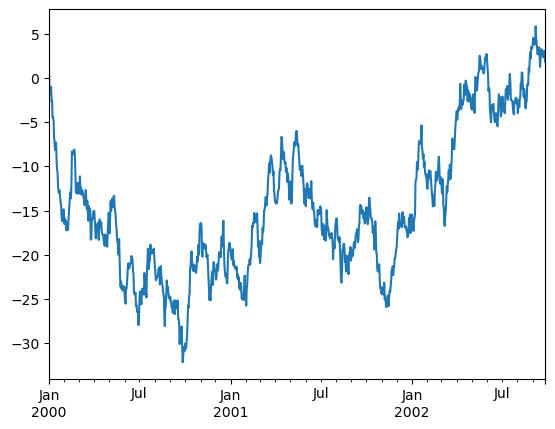

In [121]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

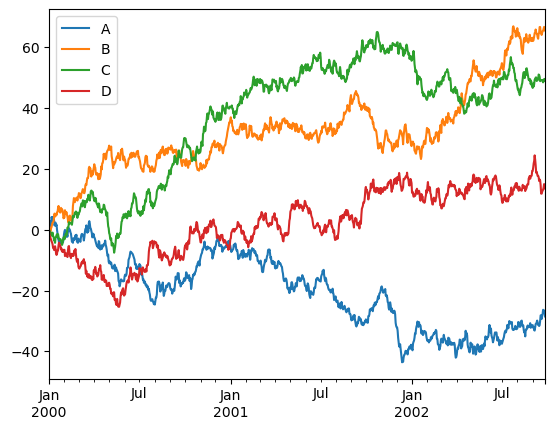

In [129]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');